# Titanic Survival Prediction with Machine Learning

The project consists in predicting the survival probability for the passengers of the Titanic, that shipwrecked at 1912.

The dataset contains:
- A training set with information of 891 passengers (Ticket ID, Sex, age, etc.) and their survival.
- A test set with information of 418 passengers without their survival data.

![](https://img.freepik.com/fotos-premium/uss-astoria-libro-colorear-divertido-estilo-dibujos-animados-clipart-barco-ninos_899449-59143.jpg)

# Load libraries and dataset

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_submission_example = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# Exploratory Data Analysis (EDA)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df_submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# Feature engineering

Before training a model, we check which variables are interesting and if we can do some preprocessing to improve the model performance.

First, we check the distribution and survival rates of some categorical variables.

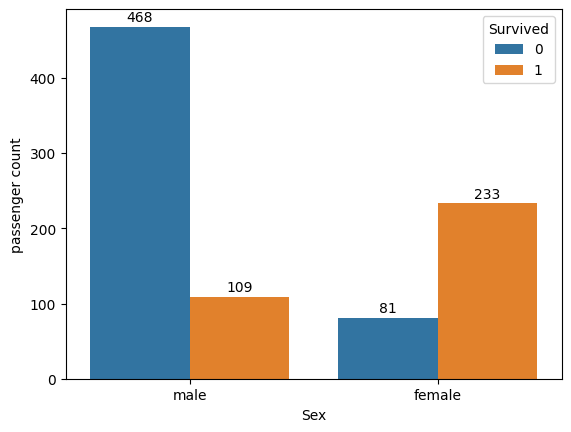

In [22]:
sns.countplot(data=df, x='Sex', hue='Survived')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)
plt.ylabel("passenger count")
plt.show()

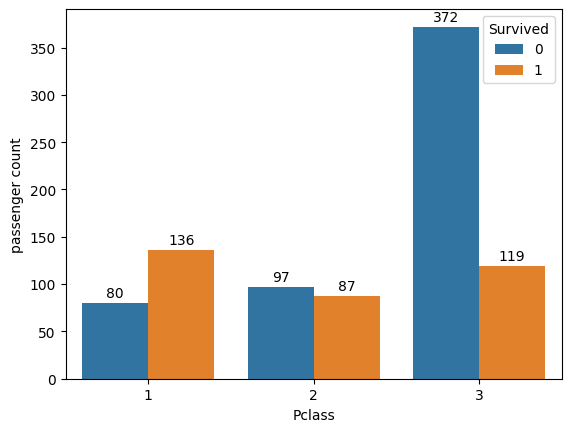

In [23]:
sns.countplot(data=df, x='Pclass', hue='Survived')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)
plt.ylabel("passenger count")
plt.show()

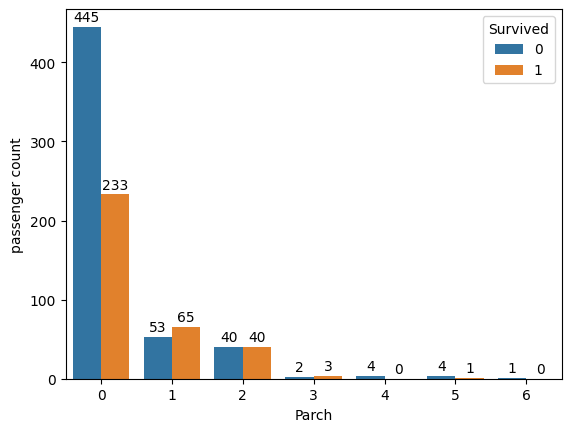

In [24]:
sns.countplot(data=df, x='Parch', hue='Survived')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)
plt.ylabel("passenger count")
plt.show()

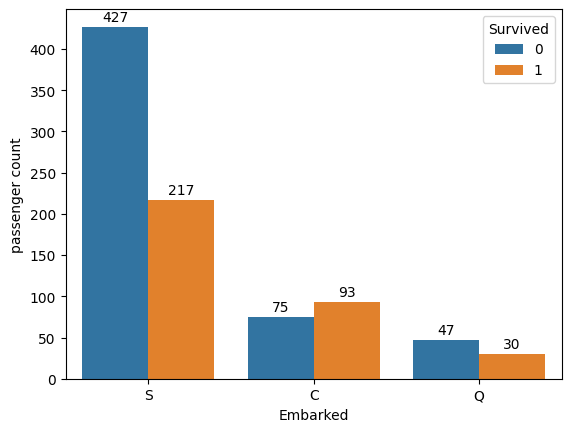

In [25]:
sns.countplot(data=df, x='Embarked', hue='Survived')
for container in plt.gca().containers:
    plt.bar_label(container, label_type="edge", padding=2)
plt.ylabel("passenger count")
plt.show()

Other potentially interesting variables are:
- Alphabetic order of name
- Age range: baby, minor, adult, elder
- If the person was alone or accompanied

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [31]:
# Remove some columns
print(df.columns)
cols = ['PassengerId', 'Ticket', 'Cabin']
df_model = df.drop(cols, axis=1)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Column transformations:
- Pclass: one-hot encoding
- Name: numbers from the first letter
- Sex: one-hot encoding
- Age: age ranges and one-hot encoding
- SibSp: maybe ranges and one-hot encoding
- Fare: maybe ranges and one-hot encoding
- Parch: maybe ranges and one-hot encoding
- Embarked: one-hot encoding

In [33]:
def getAgeRanges(ages):
    '''Get the age ranges for the given ages'''
    AgeRange = []
    for i in ages:
        if i < 2:
            AgeRange.append('baby')
        elif i < 18:
            AgeRange.append('minor')
        elif i < 65:
            AgeRange.append('adult')
        elif i < 120:
            AgeRange.append('elder')
        else: 
            AgeRange.append('adult') # null values are considered adults
    return AgeRange

In [34]:
df_model['AgeRange'] = getAgeRanges(df_model['Age'])
df_model.drop('Age', axis=1, inplace=True)

In [35]:
df_model.groupby('AgeRange')['Survived'].mean()

AgeRange
adult    0.365059
baby     0.857143
elder    0.090909
minor    0.494949
Name: Survived, dtype: float64

In [36]:
# Check other columns
df_model.groupby('Embarked')['Survived'].mean()
df_model['Embarked_C'] = df_model['Embarked'].apply(
    lambda x: True if x == 'C' else False)
df_model.drop('Embarked', axis=1, inplace=True)

In [37]:
# Transform name column into cardinal of its first letter
FirstLetter = [ord(n[0]) - 65 for n in df_model['Name']]
print(FirstLetter[:10])
df_model.drop('Name', axis=1, inplace=True)
df_model['FirstLetter'] = FirstLetter

[1, 2, 7, 5, 0, 12, 12, 15, 9, 13]


In [38]:
# Create a column to check who was alone
df_model['Accompanied'] = (
    df_model['SibSp'].apply(lambda x: False if x == 0 else True) 
    + df_model['Parch'].apply(lambda x: False if x == 0 else True))
print(df_model['Accompanied'].value_counts())

Accompanied
False    537
True     354
Name: count, dtype: int64


In [39]:
# Convert categorical variables into binary variables, for machine learning
df_dummies = pd.get_dummies(df_model[['Sex', 'AgeRange']], drop_first=True)
df_dummies.head()

,Sex_male,AgeRange_baby,AgeRange_elder,AgeRange_minor
0,True,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,True,False,False,False


In [40]:
df_model.drop(['AgeRange', 'Sex'], axis=1, inplace=True)
df_model = df_model.join(df_dummies)
df_model.head()

,Survived,Pclass,SibSp,Parch,Fare,Embarked_C,FirstLetter,Accompanied,Sex_male,AgeRange_baby,AgeRange_elder,AgeRange_minor
0,0,3,1,0,7.2500,False,1,True,True,False,False,False
1,1,1,1,0,71.2833,True,2,True,False,False,False,False
2,1,3,0,0,7.9250,False,7,False,False,False,False,False
3,1,1,1,0,53.1000,False,5,True,False,False,False,False
4,0,3,0,0,8.0500,False,0,False,True,False,False,False


In [41]:
# Display correlation matrix
df_corr = df_model.corr()
df_corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,Survived,Pclass,SibSp,Parch,Fare,Embarked_C,FirstLetter,Accompanied,Sex_male,AgeRange_baby,AgeRange_elder,AgeRange_minor
Survived,1.00,-0.34,-0.04,0.08,0.26,0.17,-0.07,0.20,-0.54,0.12,-0.07,0.08
Pclass,-0.34,1.00,0.08,0.02,-0.55,-0.24,0.07,-0.14,0.13,0.03,-0.08,0.12
SibSp,-0.04,0.08,1.00,0.41,0.16,-0.06,-0.01,0.58,-0.11,0.10,-0.04,0.30
Parch,0.08,0.02,0.41,1.00,0.22,-0.01,-0.03,0.58,-0.25,0.16,-0.03,0.27
Fare,0.26,-0.55,0.16,0.22,1.00,0.27,-0.05,0.27,-0.18,0.00,-0.01,-0.01
Embarked_C,0.17,-0.24,-0.06,-0.01,0.27,1.00,0.01,0.10,-0.08,0.05,0.02,0.00
FirstLetter,-0.07,0.07,-0.01,-0.03,-0.05,0.01,1.00,-0.06,0.02,-0.04,-0.03,-0.02
Accompanied,0.20,-0.14,0.58,0.58,0.27,0.10,-0.06,1.00,-0.30,0.16,-0.05,0.27
Sex_male,-0.54,0.13,-0.11,-0.25,-0.18,-0.08,0.02,-0.30,1.00,0.02,0.08,-0.12
AgeRange_baby,0.12,0.03,0.10,0.16,0.00,0.05,-0.04,0.16,0.02,1.00,-0.01,-0.04


In [42]:
# Drop uncorrelated columns
df_model.drop(['SibSp', 'Parch', 'FirstLetter', 'Fare'], axis=1, inplace=True)

# Machine Learning

In [43]:
RANDOM_SEED = 2010

## Test some models

In [44]:
# Prepare data for training. Split data into training and validation
from sklearn.model_selection import train_test_split

df_train, df_val = train_test_split(df_model, 
                                    test_size=0.2, 
                                    random_state=RANDOM_SEED)

print(f'Training dataset: {len(df_model)} samples.')
print(f'Validation dataset: {len(df_val)} samples.')

Training dataset: 891 samples.
Validation dataset: 179 samples.


In [45]:
# Split data into features and target variable
target = 'Survived'

X_train = df_train.iloc[:, 1:]
X_val = df_val.iloc[:, 1:]

y_train = df_train[target]
y_val = df_val[target]

In [46]:
# Create datasets without validation split
X_train_full = df_model.iloc[:, 1:]
y_train_full = df_model[target]

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Random Forest

In [48]:
# Standard Random Forest, non-linear classifier
from sklearn.ensemble import RandomForestClassifier

model_forest = make_pipeline(StandardScaler(),
                             RandomForestClassifier(
                                 n_estimators=1000, 
                                 random_state=RANDOM_SEED))
model_forest.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=1000, random_state=2010))])

In [49]:
y_pred = model_forest.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8435754189944135


## Gradient Boost

In [50]:
# Ensemble method that trains multiple classifiers
from sklearn.ensemble import GradientBoostingClassifier

model_GB = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(random_state=RANDOM_SEED, 
                                      n_estimators=100, 
                                      subsample=0.5, 
                                      validation_fraction=0.2,
                                      verbose=1, 
                                      n_iter_no_change=20))
model_GB.fit(X_train_full, y_train_full)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2612           0.0758            0.16s
         2           1.1906           0.0593            0.15s
         3           1.0866           0.0545            0.14s
         4           1.0977           0.0453            0.13s
         5           0.9957           0.0311            0.13s
         6           1.0297           0.0268            0.12s
         7           0.9754           0.0234            0.12s
         8           0.9498           0.0217            0.11s
         9           0.9690           0.0173            0.11s
        10           0.9135           0.0076            0.11s
        20           0.8496           0.0019            0.09s
        30           0.8301          -0.0015            0.08s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(n_iter_no_change=20,
                                            random_state=2010, subsample=0.5,
                                            validation_fraction=0.2,
                                            verbose=1))])

In [51]:
y_pred = model_GB.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8379888268156425


## Logistic Regression

In [52]:
# Logistic Regression, a linear classification model
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state=RANDOM_SEED, 
                               max_iter=1000)

model_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=2010)

In [53]:
y_pred = model_log.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(accuracy)

0.8212290502793296


# Make prediction

In [54]:
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
# Prepare the data for submission with the same transformations as the training data.
# This is a step needed to pass the data to the model.
test_ids = df_test['PassengerId']

df_test['AgeRange'] = getAgeRanges(df_test['Age'])
df_test['Embarked_C'] = df_test['Embarked'].apply(
    lambda x: True if x == 'C' else False)
df_test['Accompanied'] = (
    df_test['SibSp'].apply(lambda x: False if x == 0 else True) 
    + df_test['Parch'].apply(lambda x: False if x == 0 else True))

df_dummies = pd.get_dummies(df_test[['Sex', 'AgeRange']], 
                            drop_first=True)
df_test.drop(
    ['PassengerId', 'Age', 'AgeRange', 'Sex', 'Ticket', 
     'Cabin', 'Embarked', 'Name', 'Fare', 'SibSp', 'Parch'], 
    axis=1, inplace=True)
df_test = df_test.join(df_dummies)

In [56]:
# Fill fare null value
#df_test.loc[df_test['Fare'].isnull(), 'Fare'] = df_test['Fare'].mean()
#df_test[df_test['Fare'].isnull()]

In [57]:
df_test.head()

,Pclass,Embarked_C,Accompanied,Sex_male,AgeRange_baby,AgeRange_elder,AgeRange_minor
0,3,False,False,True,False,False,False
1,3,False,True,False,False,False,False
2,2,False,False,True,False,False,False
3,3,False,False,True,False,False,False
4,3,False,True,False,False,False,False


In [58]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          418 non-null    int64
 1   Embarked_C      418 non-null    bool 
 2   Accompanied     418 non-null    bool 
 3   Sex_male        418 non-null    bool 
 4   AgeRange_baby   418 non-null    bool 
 5   AgeRange_elder  418 non-null    bool 
 6   AgeRange_minor  418 non-null    bool 
dtypes: bool(6), int64(1)
memory usage: 5.8 KB


In [59]:
y_test_preds = model_GB.predict(df_test)
y_test_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
df_submission_example.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [61]:
df_submission = pd.DataFrame({'PassengerID': test_ids, 
                              'Survived': y_test_preds})
df_submission.to_csv("/kaggle/working/submission.csv", index=False)

# Conclussions

We were able to obtain a model with an accuracy of 0.78 thanks to the Ensemble method: Gradient Boosting Classifier. 

The project has showed the importance of feature engineering and hyperparameter tuning, specially Stochastic Gradient Boost.